In [1]:
require(ggplot2)
require(data.table)
require(Hmisc)
require(ggthemes)
require(gridExtra)
require(grid)
require(lattice)
require(scales)
require(RColorBrewer)

Loading required package: ggplot2
Loading required package: data.table
Loading required package: Hmisc
Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, round.POSIXt, trunc.POSIXt, units

Loading required package: ggthemes
Loading required package: gridExtra

Attaching package: ‘gridExtra’

The following object is masked from ‘package:Hmisc’:

    combine

Loading required package: grid
Loading required package: scales
Loading required package: RColorBrewer


In [24]:
directory = "../../results/hardware/"
blues = brewer.pal(n = 6, "Blues")[3:6]
plotTheme <- theme_hc() + theme(legend.title=element_blank(), 
                                legend.position="top", 
                                legend.text=element_text(size=12))

In [3]:
muxStats <- fread(paste(directory, "mux_stats.csv", sep="/"), sep=",", header=TRUE)

In [4]:
head(muxStats)
colnames(muxStats)[colnames(muxStats) == "Area (um2)"] <- "areaUm2"
colnames(muxStats)[colnames(muxStats) == "Delay (ps)"] <- "delayPs"
colnames(muxStats)[colnames(muxStats) == "Power (mW)"] <- "powerMw"

,Bits,Area (um2),Delay (ps),Power (mW)
1,32.000,365.620,100.000,0.672
2,64.000,732.350,130.000,1.355
3,128.00,1471.70,130.00,2.66
4,256.0000,2984.2000,120.0000,5.3115


In [5]:
2984.2000/(200*10^6) * 100

[1] 0.0014921

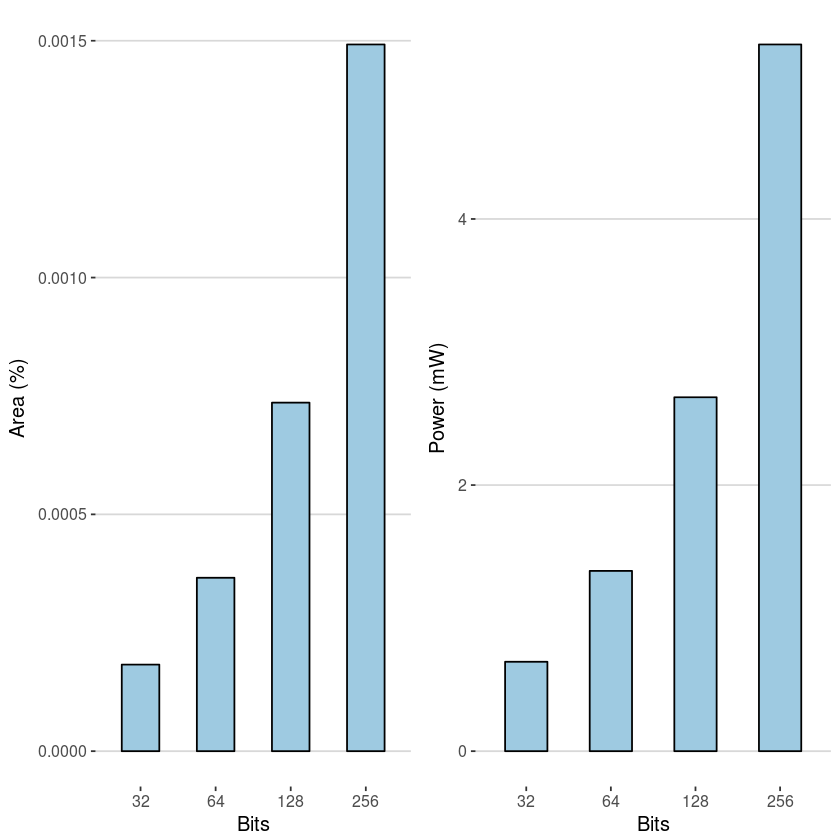

In [31]:
p1 <- ggplot(muxStats, aes(y=areaUm2/(200*(10^(6))) * 100, x=factor(Bits), fill="baseerat")) +
 stat_summary(fun.data=mean_sdl, fun.args = list(mult=1), geom="bar", width=0.5, col="black") + 
 ylab("Area (%)") +
 xlab("Bits") +
 scale_color_tableau() +
 scale_fill_manual(values=blues) +
 scale_y_continuous(labels = comma) +
 plotTheme + theme(legend.position="none")

ggsave(p1, height=3, width=2, file="hardware-mux-area.pdf")

p2 <- ggplot(muxStats, aes(y=powerMw, x=factor(Bits), fill="baseerat")) +
 stat_summary(fun.data=mean_sdl, fun.args = list(mult=1), geom="bar", width=0.5, col="black") + 
 ylab("Power (mW)") +
 xlab("Bits") +
 scale_color_tableau() +
 scale_fill_manual(values=blues) +
 plotTheme + theme(legend.position="none")

ggsave(p2, height=3, width=2, file="hardware-mux-power.pdf")

combined <- grid.arrange(p1, p2, ncol=2)
ggsave(combined, height=1.5, width=4, file="hardware-mux-all.pdf")

In [7]:
shifRegisterStats <- fread(paste(directory, "shift_register_stats.csv", sep="/"), sep=",", header=TRUE)

In [8]:
head(shifRegisterStats)

,Stages,Bits,Area (um2),Delay (ps),Power (mW)
1,1.00,32.00,365.80,130.00,0.67
2,1.00,64.00,734.00,140.00,1.33
3,1.00,128.00,1471.10,140.00,2.65
4,1.0,256.0,2947.9,150.0,5.3
5,8.0,32.0,4516.5,140.0,5.6
6,8.0,64.0,9056.0,150.0,11.3


In [9]:
colnames(shifRegisterStats)[colnames(shifRegisterStats) == "Area (um2)"] <- "areaUm2"
colnames(shifRegisterStats)[colnames(shifRegisterStats) == "Delay (ps)"] <- "delayPs"
colnames(shifRegisterStats)[colnames(shifRegisterStats) == "Power (mW)"] <- "powerMw"

In [10]:
shifRegisterStats

,Stages,Bits,areaUm2,delayPs,powerMw
1,1.00,32.00,365.80,130.00,0.67
2,1.00,64.00,734.00,140.00,1.33
3,1.00,128.00,1471.10,140.00,2.65
4,1.0,256.0,2947.9,150.0,5.3
5,8.0,32.0,4516.5,140.0,5.6
6,8.0,64.0,9056.0,150.0,11.3
7,8.0,128.0,18357.8,150.0,22.9
8,8.00,256.00,37723.30,160.00,44.57
9,16.0,32.0,9329.1,140.0,11.3
10,16.0,64.0,19025.6,160.0,22.9


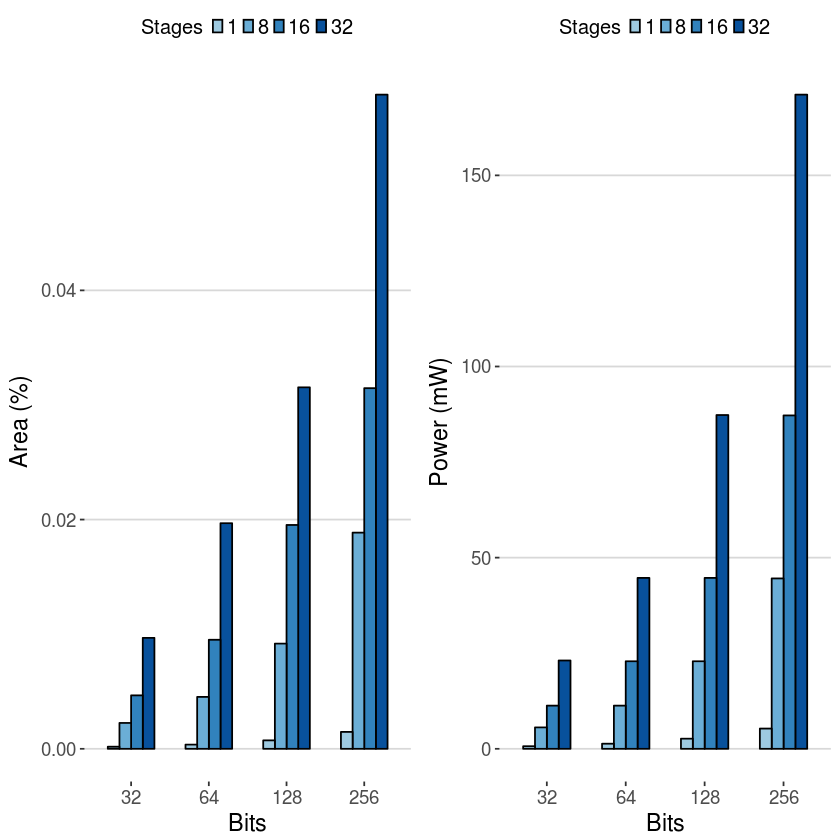

In [33]:
p3 <- ggplot(shifRegisterStats, aes(y=areaUm2/(200*(10^(6))) * 100, x=factor(Bits), fill=factor(Stages))) +
 stat_summary(fun.data=mean_sdl, fun.args = list(mult=1), geom="bar", position=position_dodge(0.6), 
              width=0.6, col="black") + 
 ylab("Area (%)") +
 xlab("Bits") +
 scale_color_tableau() +
 scale_fill_manual(values=blues, name="Stages") +
 scale_y_continuous(labels = comma) +
 plotTheme + theme(text=element_text(size=14), legend.title=element_text(size=12), legend.key.size = unit(0.25, "cm"))
ggsave(p1, height=3, width=3, file="hardware-shift-register-area.pdf")

p4 <- ggplot(shifRegisterStats, aes(y=powerMw, x=factor(Bits), fill=factor(Stages))) +
 stat_summary(fun.data=mean_sdl, fun.args = list(mult=1), geom="bar", position=position_dodge(0.6), 
              width=0.6, col="black") + 
 ylab("Power (mW)") +
 xlab("Bits") +
 scale_color_tableau() +
 scale_fill_manual(values=blues, name="Stages") +
 plotTheme + theme(text=element_text(size=14), legend.title=element_text(size=12), legend.key.size = unit(0.25, "cm"))
ggsave(p1, height=3, width=3, file="hardware-shift-register-area.pdf")

combined <- grid.arrange(p3, p4, ncol=2)
ggsave(combined, height=2, width=5, file="hardware-shift-register-all.pdf")

In [12]:
shifRegisterStats

,Stages,Bits,areaUm2,delayPs,powerMw
1,1.00,32.00,365.80,130.00,0.67
2,1.00,64.00,734.00,140.00,1.33
3,1.00,128.00,1471.10,140.00,2.65
4,1.0,256.0,2947.9,150.0,5.3
5,8.0,32.0,4516.5,140.0,5.6
6,8.0,64.0,9056.0,150.0,11.3
7,8.0,128.0,18357.8,150.0,22.9
8,8.00,256.00,37723.30,160.00,44.57
9,16.0,32.0,9329.1,140.0,11.3
10,16.0,64.0,19025.6,160.0,22.9
